Import Libraries and supporting file

In [1]:
import pandas
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import utils
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
profile_dataframe = pandas.read_csv('./Dataset/vip/annotation.csv')
profile_dataframe.head()
print(len(profile_dataframe))

1026


In [3]:
from glob import glob
all_files = glob("./Dataset/vip/data/*")
all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])

print("Total {} photos ".format(len(all_jpgs)))

Total 1026 photos 


In [4]:
id_path = [image for image in all_jpgs ]
image_dataframe = pandas.DataFrame(id_path, columns=['path'])

In [5]:
data_dataframe = image_dataframe.merge(profile_dataframe, left_index=True, right_index=True)
data_dataframe.head()

,path,image,height,weight,BMI
0,./Dataset/vip/data/f_001.jpg,f_001,1.55,61.0,25.390219
1,./Dataset/vip/data/f_002.jpg,f_002,1.76,85.0,27.440599
2,./Dataset/vip/data/f_003.jpg,f_003,1.78,56.0,17.674536
3,./Dataset/vip/data/f_004.jpg,f_004,1.63,63.0,23.711845
4,./Dataset/vip/data/f_005.jpg,f_005,1.76,54.0,17.432851


In [7]:
# import sys
# print(sys.path)
# sys.path.remove('/home/casey/catkin_ws/devel/lib/python2.7/dist-packages')
# sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

['', '/home/casey/catkin_ws/devel/lib/python2.7/dist-packages', '/opt/ros/kinetic/lib/python2.7/dist-packages', '/home/casey/anaconda3/envs/facetobmi/lib/python36.zip', '/home/casey/anaconda3/envs/facetobmi/lib/python3.6', '/home/casey/anaconda3/envs/facetobmi/lib/python3.6/lib-dynload', '/home/casey/anaconda3/envs/facetobmi/lib/python3.6/site-packages', '/home/casey/anaconda3/envs/facetobmi/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/home/casey/anaconda3/envs/facetobmi/lib/python3.6/site-packages/IPython/extensions', '/home/casey/.ipython']


In [8]:
import cv2 as cv

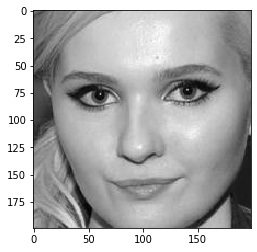

In [19]:
original_image = cv.imread(data_dataframe.iloc[0].path)
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('./haarcascade_frontalface_alt.xml')
# haar_cascade_face = cv.CascadeClassifier('data/haarcascade/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
# _ = plt.imshow(original_image)
_ = plt.imshow(grayscale_image, cmap='gray')

In [25]:
print(detected_faces)

[[ 13  12 168 168]]


In [20]:
for (column, row, width, height) in detected_faces:
    cv.rectangle(original_image, (column, row), (column + width, row + height), (0, 255, 0),2)

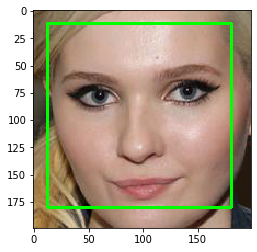

In [24]:
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
_ = plt.imshow(original_image)